# Data set information

## Input Variables:

fixed acidity: most acids involved with wine or fixed or nonvolatile


volatile acidity: the amount of acetic acid in wine


citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

residual sugar: the amount of sugar remaining after fermentation stops

chlorides: the amount of salt in the wine

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion

total sulfur dioxide: amount of free and bound forms of S02

density: the density of water is close to that of water depending on the percent alcohol and sugar content

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels

alcohol: the percent alcohol content of the wine

## Output Variable:

quality: output variable (based on sensory data, score between 3 and 8)

## Importing Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import ADASYN,SMOTE  # imblearn library can be installed in Visual Studio by going into Python Environment -> Install new package -> imblearn package
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [2]:
reddataset = pd.read_csv("redwine.csv")
whitedataset = pd.read_csv("whitewine.csv")

In [3]:
reddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
whitedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Null Check

In [5]:
reddataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
whitedataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

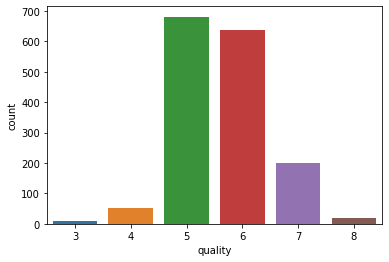

In [7]:
sns.countplot(reddataset['quality'])

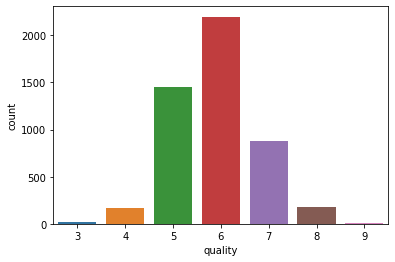

In [8]:
sns.countplot(whitedataset['quality'])

In [32]:
def converter(column):
    if column >= 6 :
        return 1
    elif column < 4:
        return -1
    else:
        return 0
reddataset['quality'] = reddataset['quality']#.apply(converter)
whitedataset['quality'] = whitedataset['quality']#.apply(converter)

## Fixed Acidity

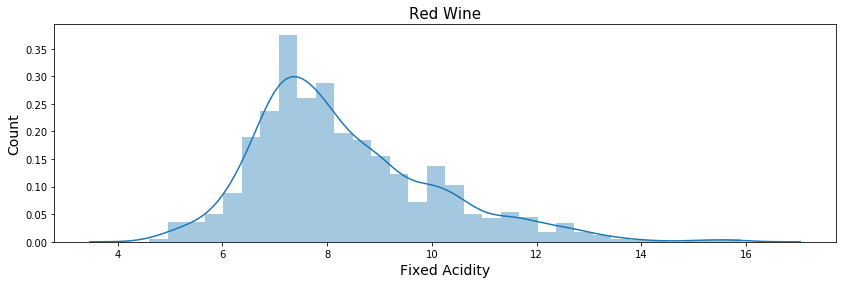

In [33]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['fixed acidity'], ax = axes)
axes.set_xlabel('Fixed Acidity', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

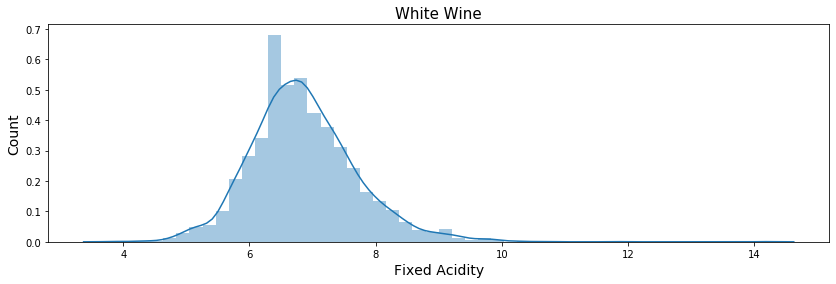

In [34]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['fixed acidity'], ax = axes)
axes.set_xlabel('Fixed Acidity', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Citric Acid

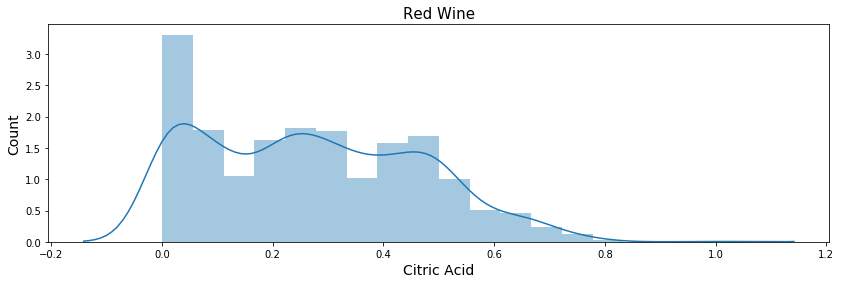

In [35]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['citric acid'], ax = axes)
axes.set_xlabel('Citric Acid', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

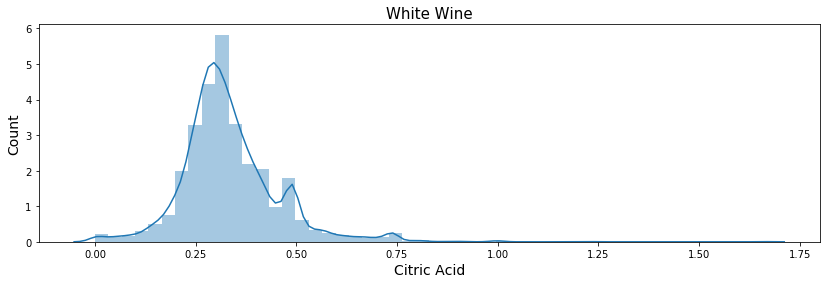

In [36]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['citric acid'], ax = axes)
axes.set_xlabel('Citric Acid', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Residual Sugar

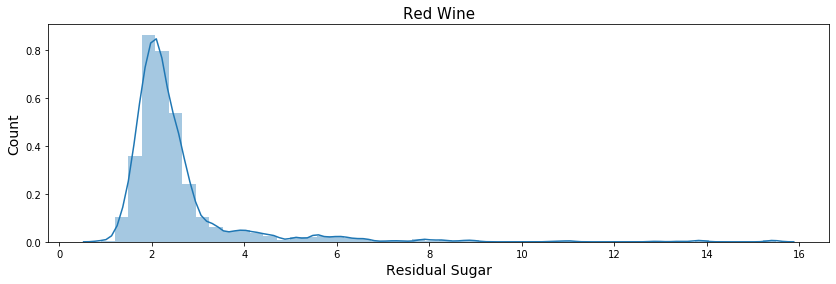

In [37]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['residual sugar'], ax = axes)
axes.set_xlabel('Residual Sugar', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

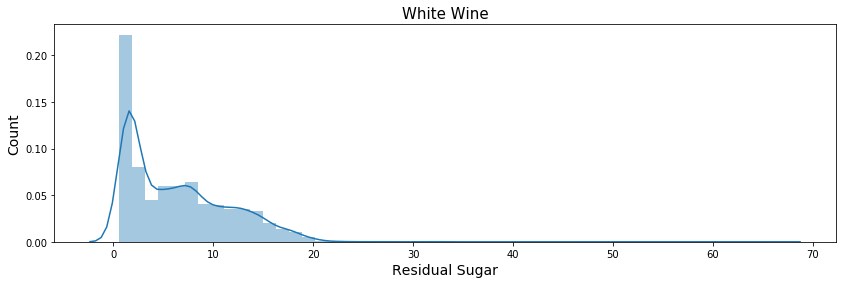

In [38]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['residual sugar'], ax = axes)
axes.set_xlabel('Residual Sugar', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Chlorides

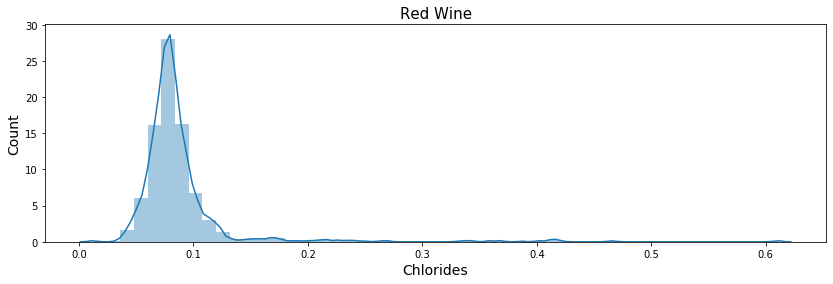

In [39]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['chlorides'], ax = axes)
axes.set_xlabel('Chlorides', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

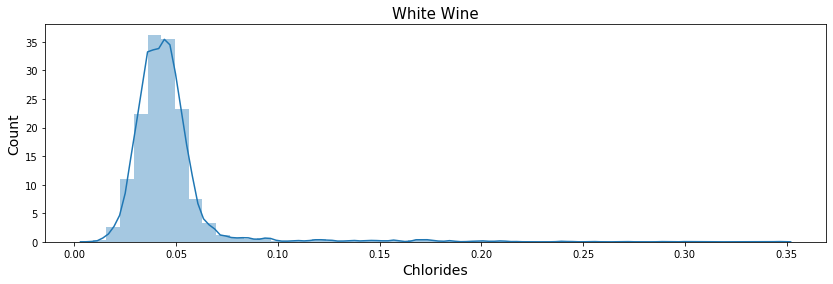

In [40]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['chlorides'], ax = axes)
axes.set_xlabel('Chlorides', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Free Sulfur Dioxide

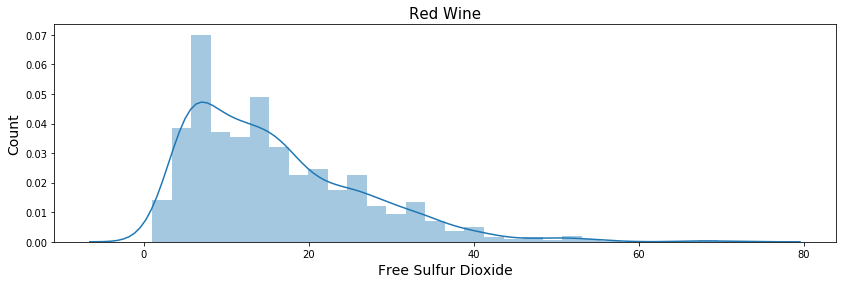

In [41]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['free sulfur dioxide'], ax = axes)
axes.set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

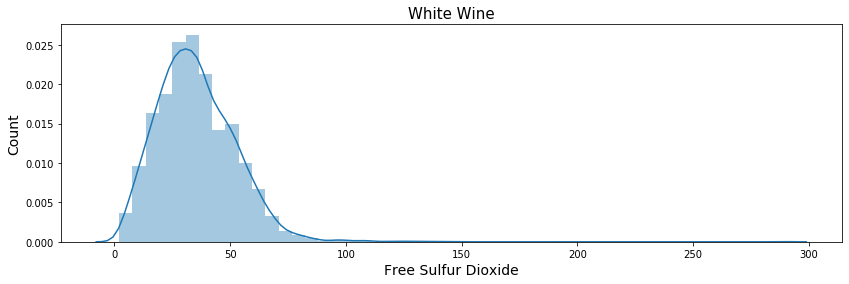

In [42]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['free sulfur dioxide'], ax = axes)
axes.set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Total Sulfur Dioxide

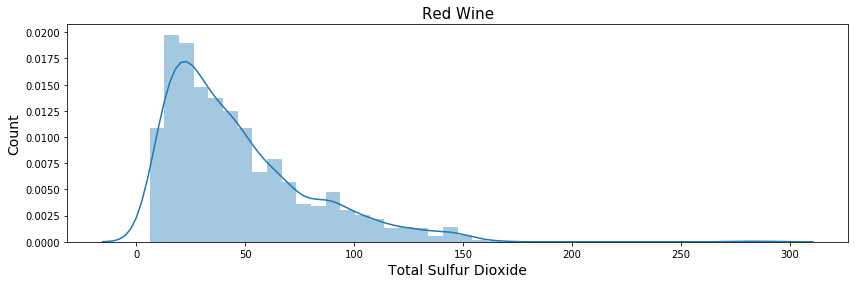

In [43]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['total sulfur dioxide'], ax = axes)
axes.set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

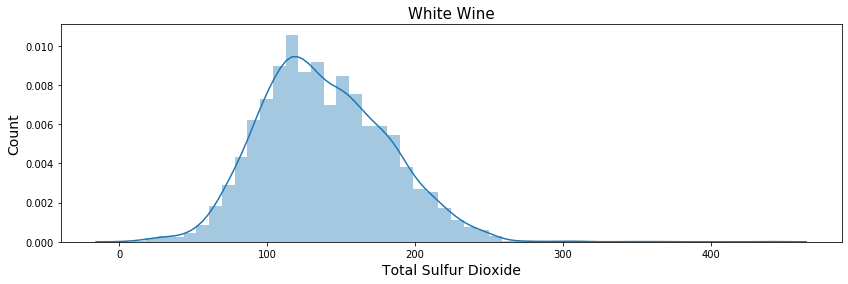

In [44]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['total sulfur dioxide'], ax = axes)
axes.set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Density

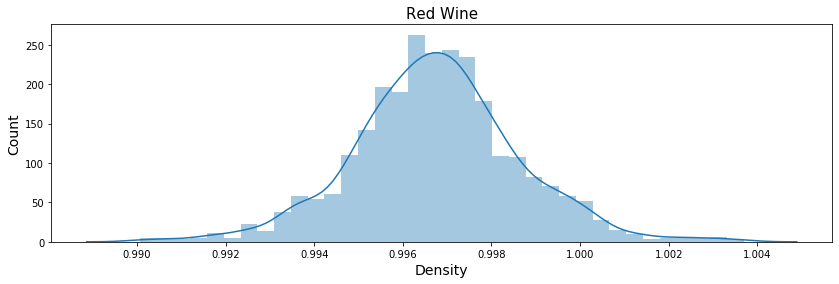

In [45]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['density'], ax = axes)
axes.set_xlabel('Density', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

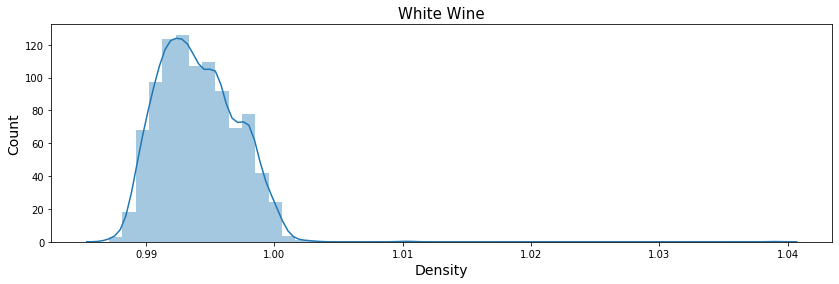

In [46]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['density'], ax = axes)
axes.set_xlabel('Density', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## pH

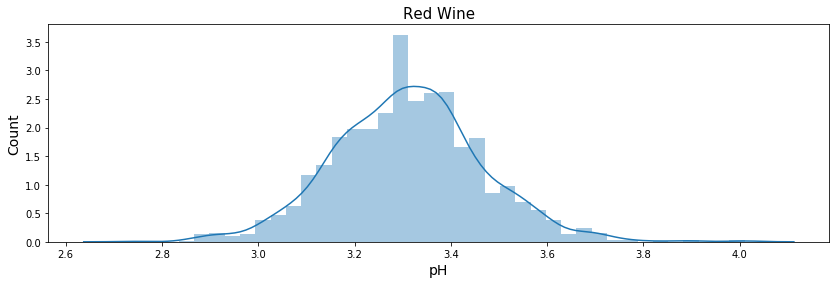

In [47]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['pH'], ax = axes)
axes.set_xlabel('pH', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

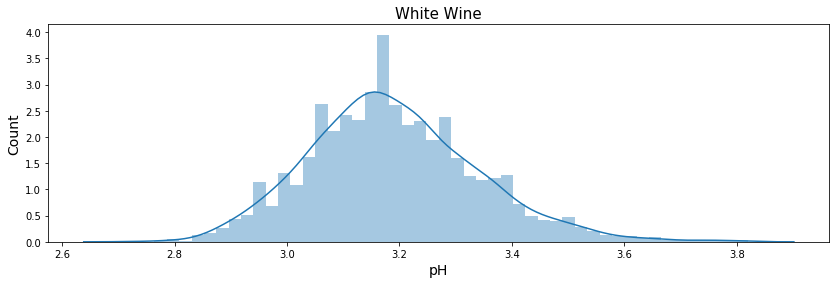

In [48]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['pH'], ax = axes)
axes.set_xlabel('pH', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Sulphates

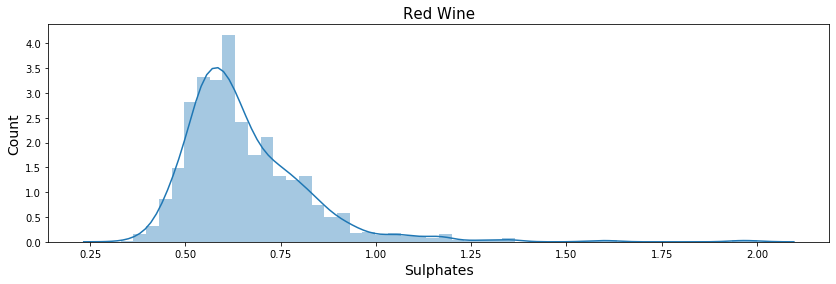

In [49]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['sulphates'], ax = axes)
axes.set_xlabel('Sulphates', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

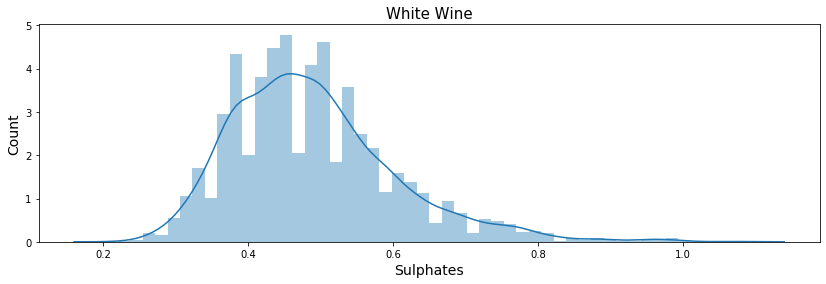

In [50]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['sulphates'], ax = axes)
axes.set_xlabel('Sulphates', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

## Alcohol

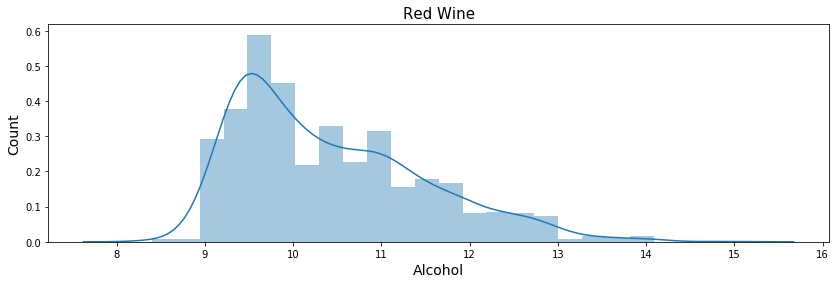

In [51]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(reddataset['alcohol'], ax = axes)
axes.set_xlabel('Alcohol', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('Red Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

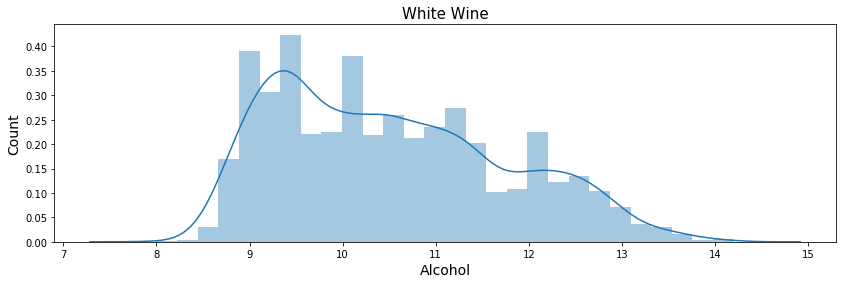

In [52]:
f, axes = plt.subplots(1,figsize=(14,4))

sns.distplot(whitedataset['alcohol'], ax = axes)
axes.set_xlabel('Alcohol', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_title('White Wine', fontsize=15)
axes.yaxis.tick_left()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 1, "Alcohol percent in each level of Red Wine's quality")

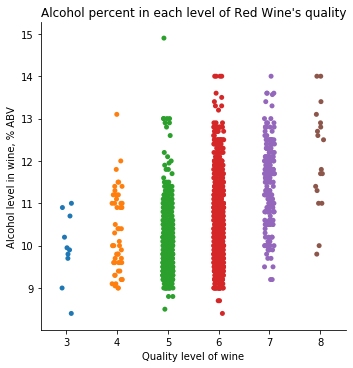

In [53]:
import seaborn
import scipy.stats
seaborn.factorplot(x="quality", y="alcohol", data=reddataset, kind="strip")
plt.xlabel("Quality level of wine")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of Red Wine's quality")

Text(0.5, 1, "Alcohol percent in each level of White Wine's quality")

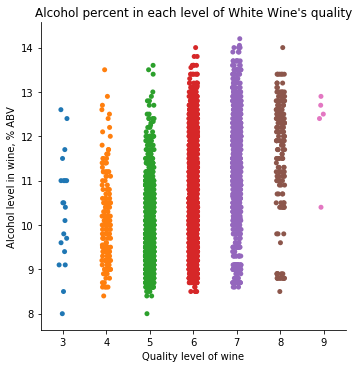

In [54]:
seaborn.factorplot(x="quality", y="alcohol", data=whitedataset, kind="strip")
plt.xlabel("Quality level of wine")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of White Wine's quality")

### Association between wine's density and residual sugar

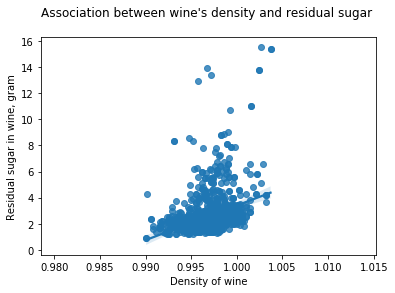

In [55]:
scat1 = seaborn.regplot(x = "density", y = "residual sugar", fit_reg = True, data = reddataset)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine, gram")
plt.title("Association between wine's density and residual sugar \n")
plt.show()

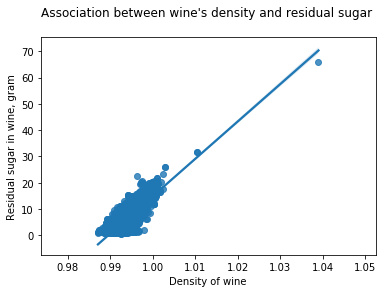

In [56]:
scat1 = seaborn.regplot(x = "density", y = "residual sugar", fit_reg = True, data = whitedataset)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine, gram")
plt.title("Association between wine's density and residual sugar \n")
plt.show()

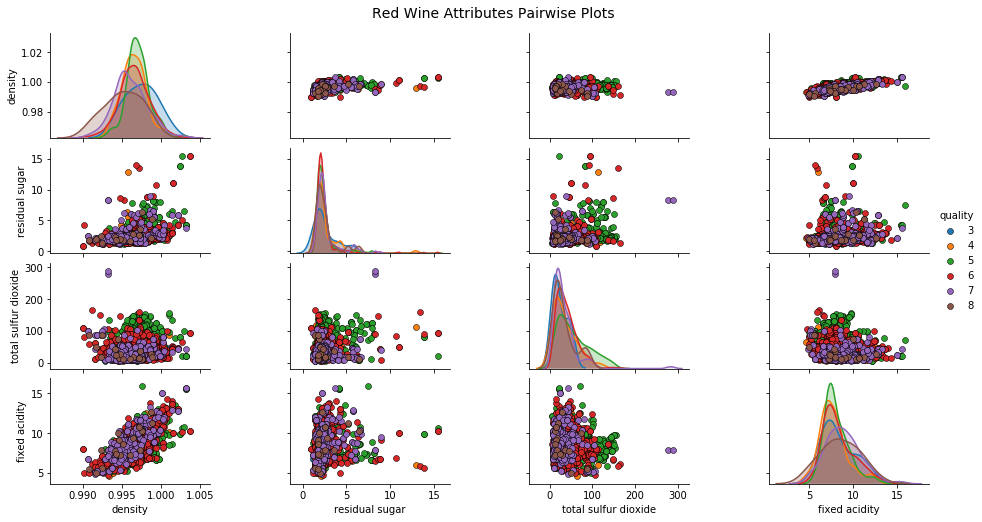

In [57]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'quality']
pp = sns.pairplot(reddataset[cols], height=1.8, hue = 'quality' , aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Red Wine Attributes Pairwise Plots', fontsize=14)

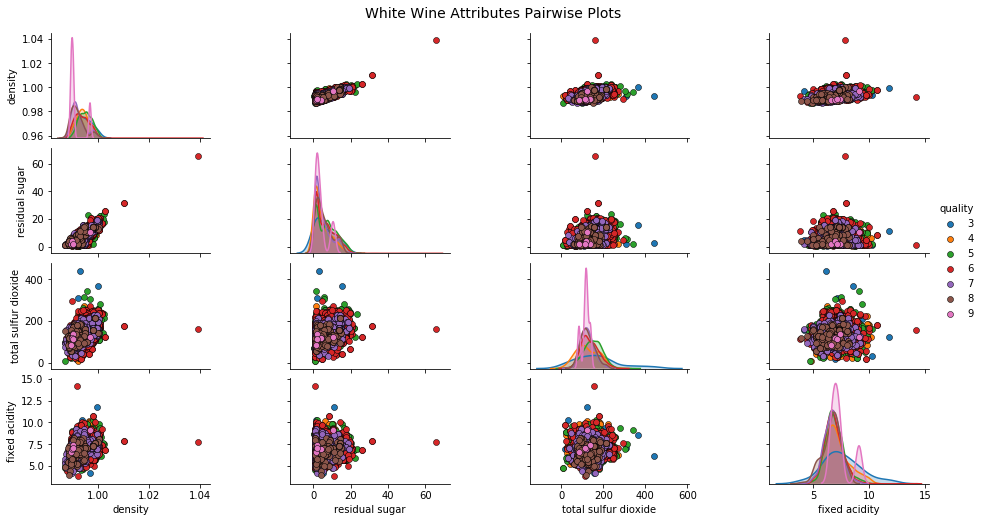

In [58]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'quality']
pp = sns.pairplot(whitedataset[cols], height=1.8, hue = 'quality' , aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('White Wine Attributes Pairwise Plots', fontsize=14)

### Two Continuous Numeric attributes

Text(0.5, 1.05, 'Red Wine Sulphates - Alcohol Content')

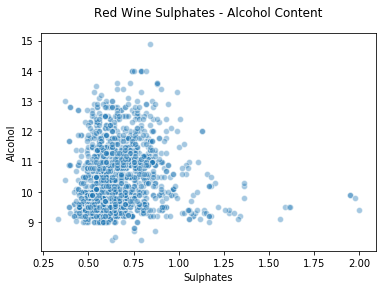

In [59]:
plt.scatter(reddataset['sulphates'], reddataset['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Red Wine Sulphates - Alcohol Content',y=1.05)

Text(0.5, 1.05, 'White Wine Sulphates - Alcohol Content')

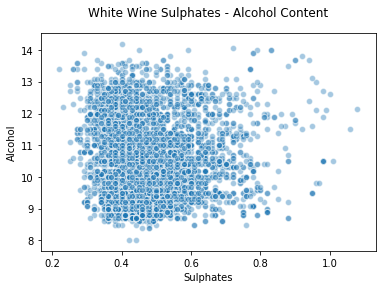

In [60]:
plt.scatter(whitedataset['sulphates'], whitedataset['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('White Wine Sulphates - Alcohol Content',y=1.05)